In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('/content/drive/MyDrive/infobyte/Advertising.csv')

In [3]:
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [5]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [6]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
df.shape

(200, 4)

In [9]:
df.isnull().values.any()

False

In [10]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


<AxesSubplot:>

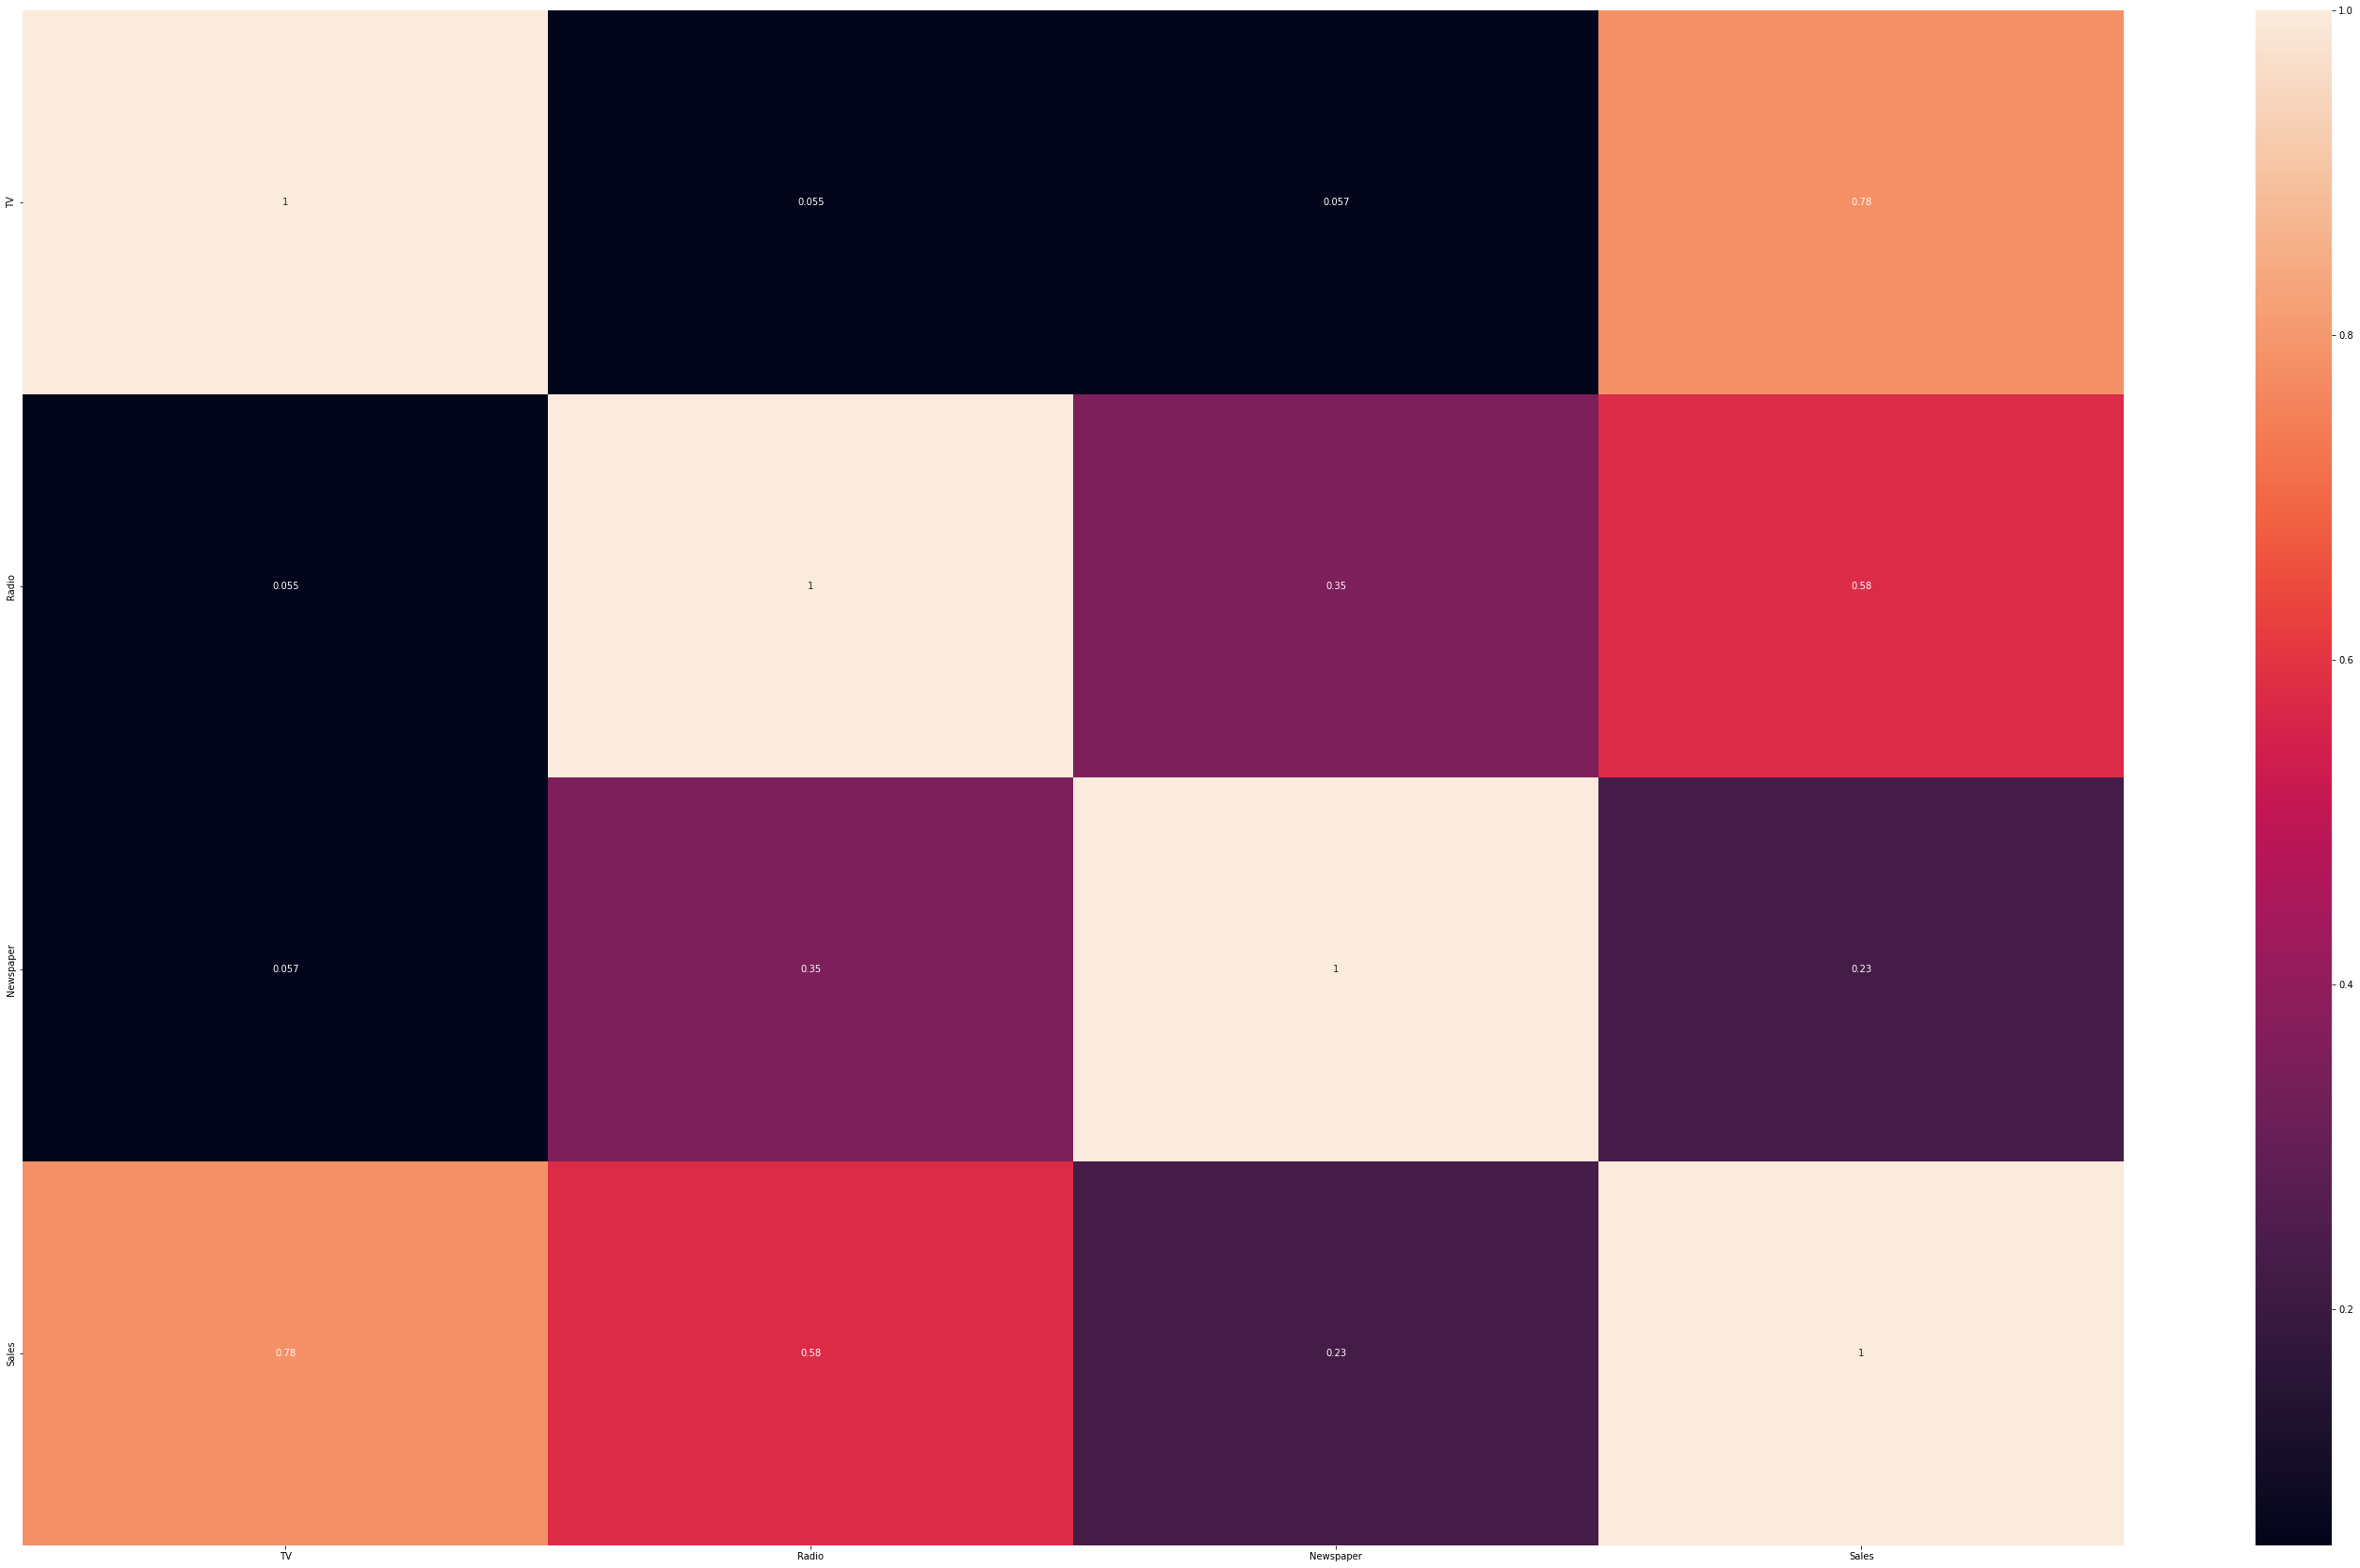

In [11]:
plt.figure(figsize=(50,30))
sns.heatmap(df.corr(),annot=True)

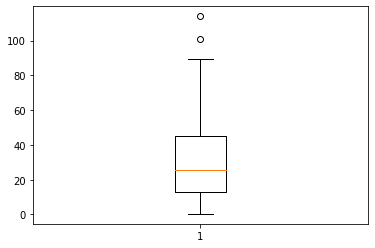

<Figure size 720x504 with 0 Axes>

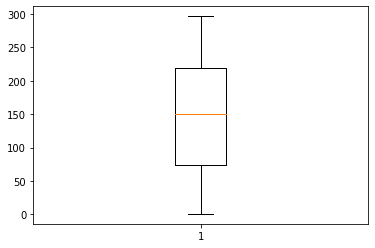

<Figure size 720x504 with 0 Axes>

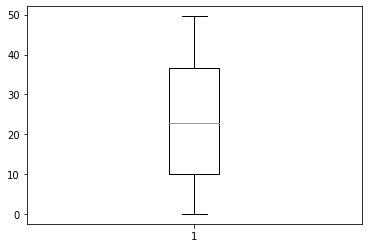

<Figure size 720x504 with 0 Axes>

In [12]:
plt.boxplot(df['Newspaper'])
fig = plt.figure(figsize =(10, 7))
plt.show()

plt.boxplot(df['TV'])
fig = plt.figure(figsize =(10, 7))
plt.show()

plt.boxplot(df['Radio'])
fig = plt.figure(figsize =(10, 7))
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sales', ylabel='Density'>

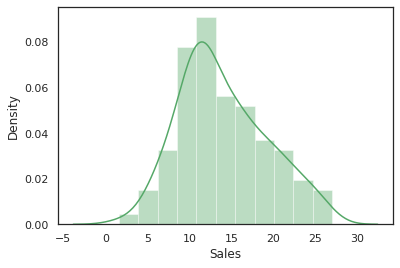

In [13]:
sns.set( style = "white" )   
# Plot a simple histogram and kde 
# with binsize determined automatically
sns.distplot(df['Sales'], kde = True, color = 'g')

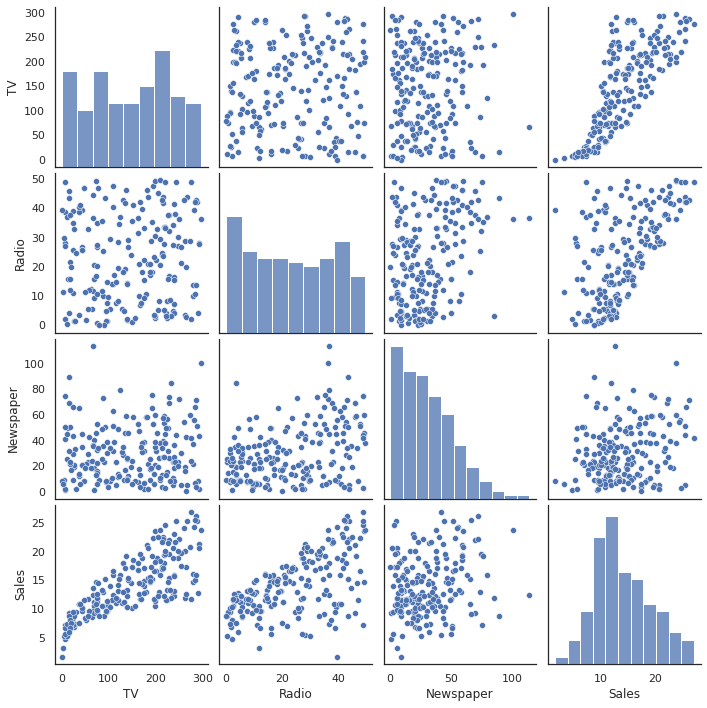

In [14]:
sns.pairplot(data=df)
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


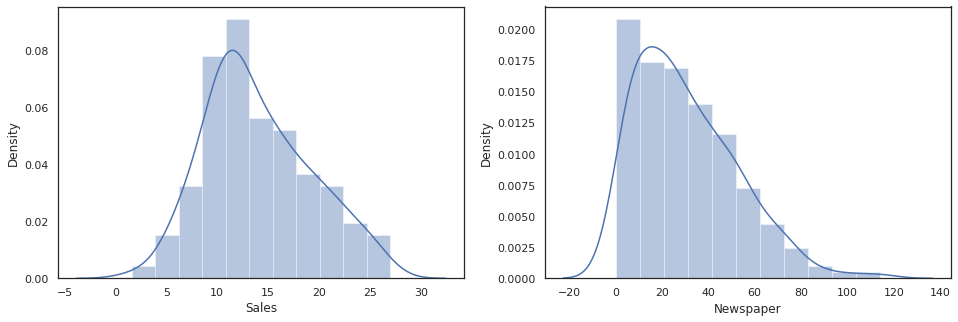

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


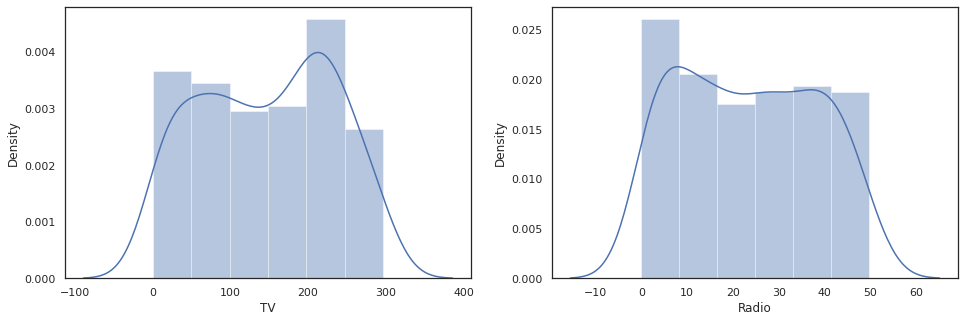

In [15]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['Sales'])
plt.subplot(1,2,2)
sns.distplot(df['Newspaper'])
plt.show()
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['TV'])

plt.subplot(1,2,2)
sns.distplot(df['Radio'])
plt.show()

In [16]:
print("Newspaper std values: ")
print("Highest allowed",df['Newspaper'].mean() + 3*df['Newspaper'].std())
print("Lowest allowed",df['Newspaper'].mean() - 3*df['Newspaper'].std())

print("\nTV std values: ")
print("Highest allowed",df['TV'].mean() + 3*df['TV'].std())
print("Lowest allowed",df['TV'].mean() - 3*df['TV'].std())

print("\nRadio std values: ")
print("Highest allowed",df['Radio'].mean() + 3*df['Radio'].std())
print("Lowest allowed",df['Radio'].mean() - 3*df['Radio'].std())

print("\nSales std values: ")
print("Highest allowed",df['Sales'].mean() + 3*df['Sales'].std())
print("Lowest allowed",df['Sales'].mean() - 3*df['Sales'].std())

Newspaper std values: 
Highest allowed 95.88986251556847
Lowest allowed -34.781862515568484

TV std values: 
Highest allowed 404.60520894472427
Lowest allowed -110.52020894472426

Radio std values: 
Highest allowed 67.80442752850618
Lowest allowed -21.276427528506165

Sales std values: 
Highest allowed 29.674869697131435
Lowest allowed -1.6298696971314328


In [17]:
X = df.drop('Sales', axis = 1)
y = df['Sales']
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 20)

In [18]:
X_train

,TV,Radio,Newspaper
134,36.9,38.6,65.6
62,239.3,15.5,27.3
20,218.4,27.7,53.4
21,237.4,5.1,23.5
45,175.1,22.5,31.5
...,...,...,...
148,38.0,40.3,11.9
137,273.7,28.9,59.7
156,93.9,43.5,50.5
15,195.4,47.7,52.9


In [19]:
lr = LinearRegression()

lr.fit(X_train, y_train)
y_pred = lr.predict(X_train)

In [20]:
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.9149231325447824
0.8568542870042719


In [21]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

preds = rf_model.predict(X_test)

print('Random Forest: ', r2_score(y_test, preds))

Random Forest:  0.9699101844245874
